## Исследование данных о российском кинопрокате



В данном проекте будут выполняться следующие задачи:

1. Объединить данные из двух файлов в один датафрейм.

2. Проверить типы данных в датафрейме и преобразовать их там, где это необходимо.

3. Изучить пропуски в датафрейме. Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать.

4. Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.

5. Изучить столбцы, которые содержат категориальные значения:

* Посмотреть, какая общая проблема встречается почти во всех категориальных столбцах;
* Исправить проблемные значения в поле type.

6. Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

7. Добавить новые столбцы:

* Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма;
* Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
* Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.

8. Посмотреть, сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.

9. Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

10. С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.

11. Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.

Мы располагаем таблицами, которые хранятся по адресам:

/datasets/mkrf_movies.csv — данные о прокатных удостоверениях.

/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах.

и имеют следующую информацию:

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
puNumber — номер прокатного удостоверения;
box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>


mkrf_movies Cодержит столбцы:

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.


mkrf_shows Cодержит столбцы:

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях

In [1]:
# Импортироуем библиотеки с которыми будем работать

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Убираем ограничение на количество столбцов при выводе для удобства работы
Задаем формат отображения числе, чтобы числа отображались в десятичной виде, а не в экспоненциальной форме

In [2]:
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

Получаем данные из файла mkrf_movies.csv , сохранянм в data (основной DataFrame)
Выводим общую информацию

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv' , sep  = ',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/4_project(1 module)/mkrf_movies.csv'
    data = pd.read_csv(pathik, sep  = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Получаем данные из файла mkrf_shows.csv , сохранянм в data (основной DataFrame)
Выводим общую информацию

In [7]:
try:
    df = pd.read_csv('/datasets/mkrf_shows.csv' , sep  = ',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/4_project(1 module)/mkrf_shows.csv'
    df = pd.read_csv(pathik, sep  = ',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Вывод были импортированы нужные для работы библиотеки, так же загружены файлы. просмотренные по ним типы данных и то что в них хранится

### Шаг 2. Предобработка данных

#### Выполним преобразование столбцов в один тип и слияние двух таблиц


В начале смотрим на названия стобцов и наличие пропусков данных в столбцах puNumber. Преобразовываем puNumber из data. в тот же тип что и в df

In [9]:
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

In [10]:
df.columns

Index(['puNumber', 'box_office'], dtype='object')

In [11]:
df.isna().sum()

puNumber      0
box_office    0
dtype: int64

In [12]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

проверяем на то чтобы в таблице все данные были числовыми, без пропусков,символом


In [13]:
data[~data['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В столбце есть два некоректных значения нет и 111004112. В первом символы, а во втором пробел

преобразовываем значения в число, значение в ячейке будет заменено на Nan, а затем удалим строку со значением Nan. Это поможет убрать нам строку 1797 — Курбан-роман. (История с жертвой), значение 111004112 — Паранормальный Якутск  будет приведено к числовому.

In [14]:
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce')
data = data.dropna(subset=['puNumber'])
data['puNumber'] = data['puNumber'].astype('int')

<ipython-input-14-c43a6843e3f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['puNumber'] = data['puNumber'].astype('int')


Проверяем данные на то что ключевые столбцы имеют одинаковый тип и выполняем объединение

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [17]:
data = data.merge(df, on='puNumber', how ='left')

Проверяем готовое на то что все корректно соеденилось

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [19]:
data.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1011,ТотКтоПрошелСквозьОгонь,231001012,2015-04-23T12:00:00.000Z,Художественный,"Министерство культуры Украины, Государственное...",Украина,М.Ильенко,В.Филиппов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,приключения,биография",NaN
4846,Зеленый шершень,221002611,2011-02-11T12:00:00.000Z,Художественный,"Коламбиа Пикчерз, Ориджинал Филм",США,Мишель Гондри,Нил Мориц,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.0,"боевик,комедия,криминал",NaN
4519,Как жениться и остаться холостым,221142510,2010-12-03T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
1701,Самогонщики,111008113,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"короткометражка,комедия,криминал",NaN
539,Железная леди,221037312,2012-05-17T12:00:00.000Z,Художественный,"Фильм 4, Ю Кей Фильм Каунсил, СинеСинема, Голд...",Великобритания - Франция,Филлида Ллойд,Домиан Джонс,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,биография",NaN


Вывод:был отчищен от аномалий и преобразован столбец data 'puNumber' и приведен тот же тип данных что и в df. так же ыполнено слияние двух таблиц

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Так как в пропусках содержаться данные которые могли быть пропущеные, а возможно их и не было, но восстановить их не откуда. то заменяем данные да 0/нет информации
```
film_studio — Не указано;
production_country — Страна не указана;
director — Директор не указан;
producer — Продюсер не указан;
refundable_support — 0;
nonrefundable_support — 0;
budget — 0;
financing_source — Тип финансирования не известен;
genres — Жанр не указан;
box_office — 0.


```


In [20]:
#Меняем тип данных столбца со временем чтобы с ним можно было работать
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [21]:
# смотрим уникальные значения и видим что есть nan и числа с %
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [22]:
# избавляемся от %, затем переводим в нужный тип данных, заполняем пропуски нулями, и опускаем сверхбольшие
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype(float)
data['ratings'].fillna(0, inplace=True)
data.loc[data['ratings'] > 10,    'ratings']  =   data['ratings'] / 10
data['ratings'].describe()[['min', 'max']]

min   0.00
max   9.90
Name: ratings, dtype: float64

In [23]:
#категорийные и словестные значения в столбцах в String
data['title'] = data['title'].astype('string')
data['type'] = data['type'].astype('string')
data['film_studio'] = data['film_studio'].astype('string')
data['production_country'] = data['production_country'].astype('string')
data['director'] = data['director'].astype('string')
data['producer'] = data['producer'].astype('string')
data['age_restriction'] = data['age_restriction'].astype('string')
data['financing_source'] = data['financing_source'].astype('string')
data['genres'] = data['genres'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   string             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   string             
 4   film_studio            7467 non-null   string             
 5   production_country     7483 non-null   string             
 6   director               7476 non-null   string             
 7   producer               6917 non-null   string             
 8   age_restriction        7485 non-null   string             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [24]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [25]:
# Смотрим % пропусков в данных
data.isna().mean()*100

title                    0.00
puNumber                 0.00
show_start_date          0.00
type                     0.00
film_studio              0.24
production_country       0.03
director                 0.12
producer                 7.59
age_restriction          0.00
refundable_support      95.56
nonrefundable_support   95.56
budget                  95.56
financing_source        95.56
ratings                  0.00
genres                  13.03
box_office              57.81
dtype: float64

In [26]:
# Смотрим пропуски в столбце film_studio
data.loc[data['film_studio'].isna()].sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6498,Последнее фото,112014518,2018-12-06 12:00:00+00:00,Документальный,<NA>,Россия,Е.Севастьянов,Е.Севастьянов,«18+» - запрещено для детей,NaN,NaN,NaN,<NA>,0.00,<NA>,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,<NA>,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,<NA>,0.00,<NA>,41225.00
6721,Путешествие в Париж,111002919,2019-03-01 12:00:00+00:00,Художественный,<NA>,Россия,М.Олейник (псевдоним - Мария Полякова),Н.Савко,«16+» - для детей старше 16 лет,NaN,NaN,NaN,<NA>,0.00,<NA>,NaN
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,<NA>,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,<NA>,6.90,"драма,криминал,детектив",NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,<NA>,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,<NA>,0.00,<NA>,NaN


In [27]:
# Заполняем пропуски на Не указано
data['film_studio'] = data['film_studio'].fillna('Не указано')

In [28]:
# Смотрим пропуски в столбце production_country
data.loc[data['production_country'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",<NA>,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,<NA>,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Не указано,<NA>,<NA>,<NA>,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,<NA>,4.00,"мультфильм,комедия",NaN


In [29]:
# Заполняем пропуски на Не указано
data['production_country'] = data['production_country'].fillna('Страна не указана')

In [30]:
# Смотрим пропуски в столбце financing_source
data.loc[data['financing_source'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,<NA>,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,<NA>,«6+» - для детей старше 6 лет,NaN,NaN,NaN,<NA>,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,<NA>,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,<NA>,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,<NA>,6.80,"фантастика,боевик,триллер",NaN


In [31]:
# Заполняем пропуски на Не указано
data['financing_source'] = data['financing_source'].fillna('Тип финансирования не известен')

In [32]:
# Смотрим пропуски в столбце genres
data.loc[data['genres'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Тип финансирования не известен,0.00,<NA>,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",<NA>,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Тип финансирования не известен,0.00,<NA>,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Тип финансирования не известен,0.00,<NA>,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,<NA>,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Тип финансирования не известен,0.00,<NA>,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,<NA>,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Тип финансирования не известен,0.00,<NA>,NaN


In [33]:
# Заполняем пропуски на Не указано
data['genres'] = data['genres'].fillna('Жанр не указан')

In [34]:
# т.к. фильм наверное можно снять без Директора или без Продюсера. но и у нас не откуда восстанавливать данные.
# если один есть а второго нет то прописываем что не указан


# Заполняем пропуски в столбце 'director' значениями из столбца 'producer'
data['director'] = data['director'].fillna(data['producer'])

# Заполняем пропуски в столбце 'producer' значениями из столбца 'director'
data['producer'] = data['producer'].fillna(data['director'])


data['director'] = data['director'].fillna('Директор не указан')
data['producer'] = data['producer'].fillna('Продюсер не указан')

# т.к. информации об объём возвратных средств государственной поддержки  может и не быть меняем на 0

data['refundable_support'] = data['refundable_support'].fillna(0)

# т.к. информации об объёме невозвратных средств государственной поддержки  может и не быть меняем на 0
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

# информации об бюджете так же может и  небыть, меняем на 0
data['budget'] = data['budget'].fillna(0)

# информации об сборах так же может и небыть или их не было, меняем на 0

data['box_office'] = data['box_office'].fillna(0)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   string             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   string             
 4   film_studio            7485 non-null   string             
 5   production_country     7485 non-null   string             
 6   director               7485 non-null   string             
 7   producer               7485 non-null   string             
 8   age_restriction        7485 non-null   string             
 9   refundable_support     7485 non-null   float64            
 10  nonrefundable_support  7485 non-null   float64            
 11  budget                 7485 non-null   float64          

In [36]:
data.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Вывод: были преобразованы данные в верные типы данных с котороми можно дальше работать.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [37]:
data.duplicated().sum()

0

очевидных дублей нету

Попробуем посмотреть дубли по важным стобцам: Название, Дата выхода, Тип, Студия которая снимала, страна производства.

In [38]:
data[data.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,3.50,"комедия,приключения",0.00
2190,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,5.70,"мюзикл,драма,мелодрама",0.00
2191,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,5.70,"мюзикл,драма,мелодрама",52495.00
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Тип финансирования не известен,5.20,"мультфильм,семейный,спорт",1360.00
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Тип финансирования не известен,5.20,"мультфильм,семейный,спорт",14152495.90
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,5.70,драма,0.00
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,5.70,драма,332371.00


Сохраняем в отдельную переменную дубли по имени, мы знаем что каждое второе значение дубль,  затем отсеиваем каждое второе значени и возвращаем отчищенные данные

In [39]:
dupl_data = data[data.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]
print(len(data))
len(dupl_data)

7485


16

In [40]:
dupl_data = dupl_data.iloc[::2, :]
data = pd.concat([data, dupl_data]).drop_duplicates(keep=False)
print(len(data))

7477


Проверяем Дубли по номерам

In [41]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.60,"драма,мелодрама,история",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.40,"комедия,криминал",0.00
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Тип финансирования не известен,6.80,"комедия,криминал",0.00


Правим код на уникальный номер, чтобы не было повторений, правим на min -1

In [42]:
data.loc[(data['title'] == 'Анализируй то!') & (data['puNumber'] == 221054410), 'puNumber'] = data['puNumber'].min()-1

Есть очевидные дубли, но с разными датами выхода, удаляем

In [43]:
data[data['title'].str.contains('Иоанна - женщина на папском престоле')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4049,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.60,"драма,мелодрама,история",0.00
4512,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.60,"драма,мелодрама,история",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.60,"драма,мелодрама,история",0.00


In [44]:
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,7.60,"драма,мелодрама,история",0.00


т.к. данные используются только в этом исследовании и прокатный номер нужен только как уникальный идентификатор, сделаем свой прокатный номер.

Фильм Иоанна - женщина на папском престоле..., который на данный момент имеет идентичный с фильмом Как жениться и остаться холостым прокатный номер 221154310 получит новый свободный номер: 100000001.

In [45]:
data.loc[(data['title'] == 'Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/') & (data['puNumber'] == 221154310), 'puNumber'] = data['puNumber'].min()-1

Вывод были почищенны данные от неочевидных дублей. отсеяны дубли по названию, номеру.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [46]:
data['type'].unique()

<StringArray>
[            'Художественный',               'Анимационный',
                     'Прочие',             'Документальный',
          'Научно-популярный',            ' Художественный',
              ' Анимационный', 'Музыкально-развлекательный']
Length: 8, dtype: string

In [47]:
data['type'] = data['type'].str.strip()

In [48]:
data['type'].unique()

<StringArray>
[            'Художественный',               'Анимационный',
                     'Прочие',             'Документальный',
          'Научно-популярный', 'Музыкально-развлекательный']
Length: 6, dtype: string

In [49]:
data['age_restriction'].unique()

<StringArray>
[           '«18+» - запрещено для детей',
          '«6+» - для детей старше 6 лет',
        '«12+» - для детей старше 12 лет',
        '«16+» - для детей старше 16 лет',
 '«0+» - для любой зрительской аудитории']
Length: 5, dtype: string

Тут дублей и кривых нету

In [50]:
data['financing_source'].unique()

<StringArray>
[  'Тип финансирования не известен',            'Министерство культуры',
                        'Фонд кино', 'Министерство культуры, Фонд кино']
Length: 4, dtype: string

Тут дублей и кривых нету

In [51]:
data['genres'].nunique()

743

Очень много жанров получилось, нужно смотреть что внутри.
Удаляем пробелы вначале и в конце

In [52]:
data['genres'] = data['genres'].str.strip()

In [53]:
def drop_isna_names(data, columns):
    for i in columns:
        data[f'main_{i}'] = data[i].str.split(',').str[0]
    return data


data = drop_isna_names(data, ['genres'])

In [54]:
data['main_genres'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'Жанр не указан', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

In [55]:
data['main_genres'].nunique()

29

теперь более правдоподобно количесво вариантов жанров

вывод: отчищеные явные проблемы в категорияальных данных

In [56]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                341
ООО "Мульт в кино"                                    57
Анимаккорд Лтд                                        23
ООО "Мульт в кино"                                    18
Не указано                                            17
                                                    ... 
Аннапурна Пикчерз, Колор Форс                          1
Сигнатиа, Глов, Субмарин, Хампа Студио,  Радио...      1
Бэд Айдиа, Бондит Медиа Кэпитал, Дарк Фэктори ...      1
Люкс Фильм, Сола Медиа                                 1
Долфин Интертэйнмент, Инжениус Медиа, Мэттель ...      1
Name: film_studio, Length: 5491, dtype: Int64

In [57]:
data['film_studio'] = data['film_studio'].str.strip()

In [58]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                345
ООО "Мульт в кино"                                    75
Анимаккорд Лтд                                        23
ООО "ТаББаК"                                          18
Не указано                                            17
                                                    ... 
Бона Фильм Груп, Коламбиа Пикчерз, Париа               1
Блайндинг Эйдж Пикчерз, Блюмхаус Продакшнз             1
ООО "РЕНОВАЦИО интертейнмент"                          1
ЛБИ Продакшнз, Протозоа Пикчерс, Студио 8              1
Эмблин Интертейнмент, ДримУоркс, Марк Платт Пр...      1
Name: film_studio, Length: 5463, dtype: Int64

In [59]:
data['production_country'].value_counts()

США                                                  2170
Россия                                               1818
СССР                                                  347
Франция                                               300
Великобритания                                        257
                                                     ... 
Исландия, Бельгия                                       1
Испания - Швейцария - Великобритания - Германи...       1
Киргизия-Россия                                         1
Великобритания, США, Испания                            1
Дания - Канада - Швеция - Франция - Германия -...       1
Name: production_country, Length: 951, dtype: Int64

In [60]:
data['production_country'] = data['production_country'].str.strip()

In [61]:
data['production_country'].value_counts()

США                                                  2173
Россия                                               1818
СССР                                                  377
Франция                                               301
Великобритания                                        259
                                                     ... 
Испания - Швейцария - Великобритания - Германи...       1
Киргизия-Россия                                         1
Великобритания, США, Испания                            1
Италия - Швейцария - Германия                           1
Дания - Канада - Швеция - Франция - Германия -...       1
Name: production_country, Length: 935, dtype: Int64

In [62]:
data['director'].value_counts()

О.Семёнова                                           47
Д.Червяцов                                           17
Стивен Содерберг                                     17
Ридли Скотт                                          16
Тиль Швайгер                                         14
                                                     ..
С.Сафонова, А.Хмельницкая, А.Сальянов, Н.Назар...     1
Си Чао                                                1
Е.Хломова                                             1
Джордж Рэтлифф                                        1
И.Трусов                                              1
Name: director, Length: 4817, dtype: Int64

In [63]:
data['director'] = data['director'].str.strip()

In [64]:
data['director'].value_counts()

О.Семёнова                                          60
Д.Червяцов                                          17
Стивен Содерберг                                    17
Ридли Скотт                                         16
Тиль Швайгер                                        14
                                                    ..
Понгса Корнсри, Гун Пхансувон, Нат Йосватананонт     1
Майкл Митчелл, Триша Гам                             1
Карстен Килерих                                      1
С.Крючков                                            1
И.Трусов                                             1
Name: director, Length: 4807, dtype: Int64

In [65]:
data['producer'].value_counts()

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
Кевин Фейги                                      11
                                                 ..
Александр Газула                                  1
А.Карелина, А.Филиппова, Е.Ланских                1
Кен Андерсон, Торстен Вегенер                     1
О.Лещинер, О.Ракитянский                          1
Дженнифер Додж                                    1
Name: producer, Length: 5714, dtype: Int64

In [66]:
data['producer'] = data['producer'].str.strip()

In [67]:
data['producer'].value_counts()

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
А.Тельнов                                        12
                                                 ..
Н.Маханько                                        1
Н.Петрова, А.Абовян                               1
А.Цыренов, А.Бурлов                               1
Ю.Грымов                                          1
Дженнифер Додж                                    1
Name: producer, Length: 5699, dtype: Int64

Вывод: Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Посмотрим сводную статистику по числовым значениям

In [68]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7477.00,7477.00,7477.00,7477.00,7477.00,7477.00
mean,135101346.73,526815.57,2174894.79,5649360.16,5.65,32301687.99
std,38353784.32,5784557.99,16158477.00,47556374.07,2.41,160693521.32
min,1811094.00,0.00,0.00,0.00,0.00,0.00
25%,112024918.00,0.00,0.00,0.00,5.40,0.00
50%,121015417.00,0.00,0.00,0.00,6.40,0.00
75%,124003218.00,0.00,0.00,0.00,7.20,1085575.50
max,231001111.00,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


посмотрим за какие года у нас есть информация

In [69]:
data['show_start_date'].dt.year.unique()

array([2015, 2016, 2013, 2014, 2012, 2017, 2010, 2011, 2018, 2019])

In [70]:
country_not_null = data.query('(refundable_support !=  0 or nonrefundable_support != 0) and budget !=0 ')
country_not_null['production_country'].value_counts()

Россия                                        299
Россия, Италия                                  2
Россия, Германия                                2
Россия, Франция, Латвия                         1
Россия-Украина                                  1
Россия, Украина, Польша                         1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия-Словакия-Чехия                           1
Россия, Латвия, Чешская Республика              1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Сербия                                  1
Россия - Грузия                                 1
Россия-Китай                                    1
Россия, Бельгия, Финляндия                      1
Name: production_country, dtype: Int64

из всех данных у нас только в 93 строках есть инфрмация о финансировании и бюджете

In [71]:
data.query('refundable_support !=  0 and nonrefundable_support != 0 and budget !=0 ').sort_values('box_office').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
7477,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.50,"комедия,фантастика,мелодрама",0.00,комедия
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",0.00,фантастика
3503,День До,111010916,2016-07-06 12:00:00+00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,25000000.00,25000000.00,90822766.00,Фонд кино,4.80,"драма,фантастика",9000.00,драма
2981,Сдается дом со всеми неудобствами,111008016,2016-04-27 12:00:00+00:00,Художественный,"ФГУП ""Киноконцерн ""Мосфильм"", ООО ""Киностудия ...",Россия,В.Сторожева,"К.Шахназаров, С.Говорухин",«12+» - для детей старше 12 лет,3500000.00,20000000.00,69428728.00,Фонд кино,5.80,комедия,55800.00,комедия
3146,Память осени,111000516,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Синема Продакшн""",Россия,А.Соколов,"Э.Айнулова, М.Журомская, А.Соколов",«16+» - для детей старше 16 лет,9000000.00,40000000.00,70000000.00,"Министерство культуры, Фонд кино",5.70,драма,58500.00,драма


In [72]:
data.query('show_start_date > "2019-01-01 00:00:00+00:00-01" ').sort_values('box_office').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
7019,Проект ГЕМИНИ,111010419,2019-08-08 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ""",Россия,"В.Лисневский, С.Пикалов","В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Тип финансирования не известен,5.80,"боевик,фантастика",0.00,боевик
7064,ПРЕДОК,111011519,2019-07-09 12:00:00+00:00,Художественный,"ООО ""АРТЛАЙТ""",Россия,М.Зыков,А.Новиков,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,5.60,комедия,0.00,комедия
7062,Вспыш и чудо-машинки и Расти-механик,124005119,2019-07-04 12:00:00+00:00,Анимационный,"Спин Мастер, Никелодеон Интернэшнл, Нерд Корпс...","Канада, США","Бронвин Деннисон, Мигель Мартинез-Хоффре, Пол ...","Нина Контрерас, Дэн Мокрий, Барт Дженнетт, Дэв...",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Тип финансирования не известен,0.00,Жанр не указан,0.00,Жанр не указан
7061,Мученицы,121018319,2019-07-03 12:00:00+00:00,Художественный,"Канал Хоризонс, Канал +, СинеСинема, Кредит Им...","Франция, Канада",Паскаль Ложье,"Ришар Гранньер, Симон Тротье",«18+» - запрещено для детей,0.00,0.00,0.00,Тип финансирования не известен,6.40,ужасы,0.00,ужасы
7060,... имени Сергея Герасимова,113001019,2019-07-05 12:00:00+00:00,Научно-популярный,Майоров Сергей Викторович,Россия,С.Майоров,С.Майоров,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Тип финансирования не известен,5.40,драма,0.00,драма


за весь 2019 год нету информации о сборах, но и так же о поддержке и бюджете. скорее всего на момент сбора информации не было данных

In [73]:
df = data.copy()
df[df['budget'] < df['refundable_support'] + df['nonrefundable_support']]['title'].count()

17

In [74]:
data.query('refundable_support > (budget >0 )')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,Р.Давлетьяров,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,драма
1986,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.00,30000000.00,80000000.00,Фонд кино,5.00,"семейный,комедия",121225633.80,семейный
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30000000.00,40000000.00,252489571.00,Фонд кино,6.50,"мультфильм,фэнтези,приключения",313489846.50,мультфильм
2141,Территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30000000.00,30000000.00,500000000.00,Фонд кино,6.80,"детектив,фэнтези,триллер",72578317.40,детектив
2287,12 месяцев. Новая сказка,111014414,2014-10-16 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,«0+» - для любой зрительской аудитории,15000000.00,5000000.00,90120000.00,Фонд кино,3.80,"семейный,фэнтези",32244810.00,семейный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,Фонд кино,6.80,комедия,3073568690.79,комедия
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,история
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,мультфильм
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",0.00,фантастика


Вывод: ниже представлены аномалии  по количесвенным данным, но т.к. много нулей. главная проблема это очень большой диапазон данных.

Посмотрим аномалии в количесвенных значениях

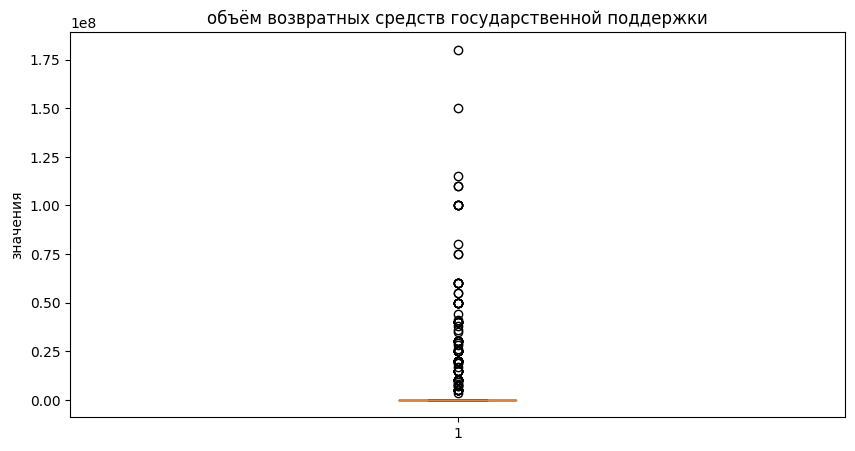

In [75]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['refundable_support'])
plt.title('объём возвратных средств государственной поддержки')
plt.ylabel('значения')
plt.show()

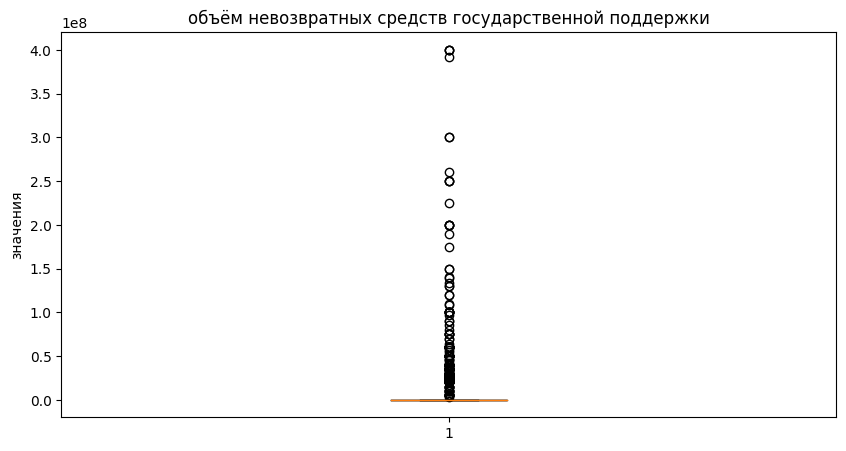

In [76]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['nonrefundable_support'])
plt.title('объём невозвратных средств государственной поддержки')
plt.ylabel('значения')
plt.show()

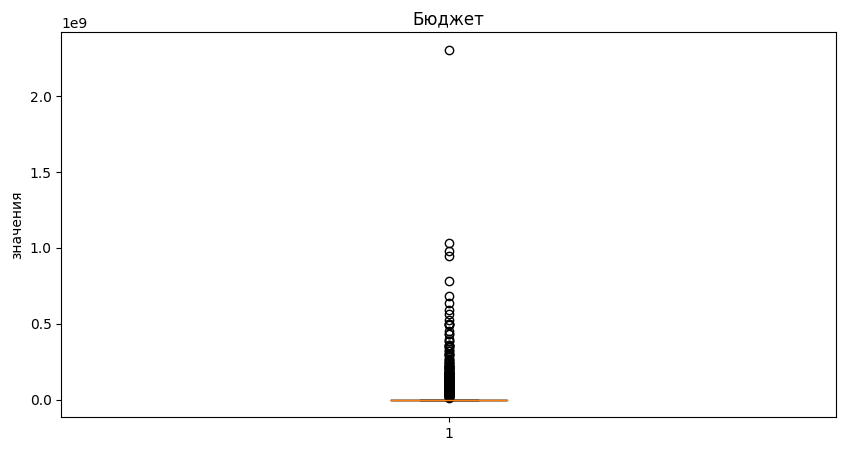

In [77]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['budget'])
plt.title('Бюджет')
plt.ylabel('значения')
plt.show()

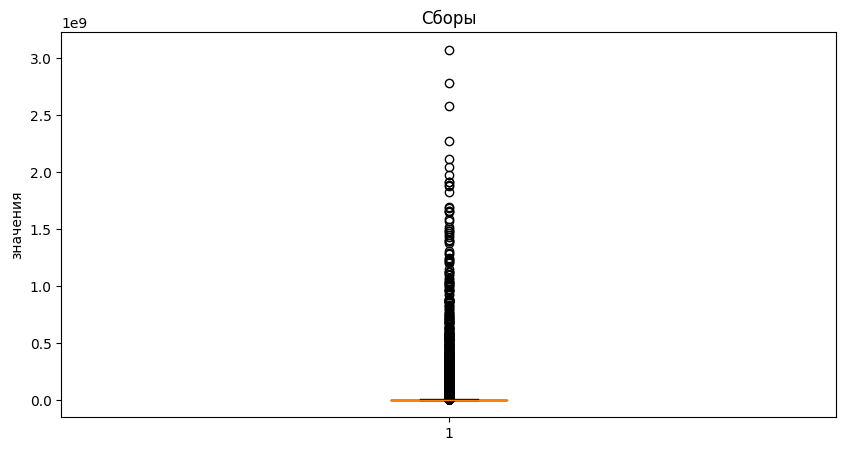

In [78]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['box_office'])
plt.title('Сборы')
plt.ylabel('значения')
plt.show()

Смотрим распределние рейтинга

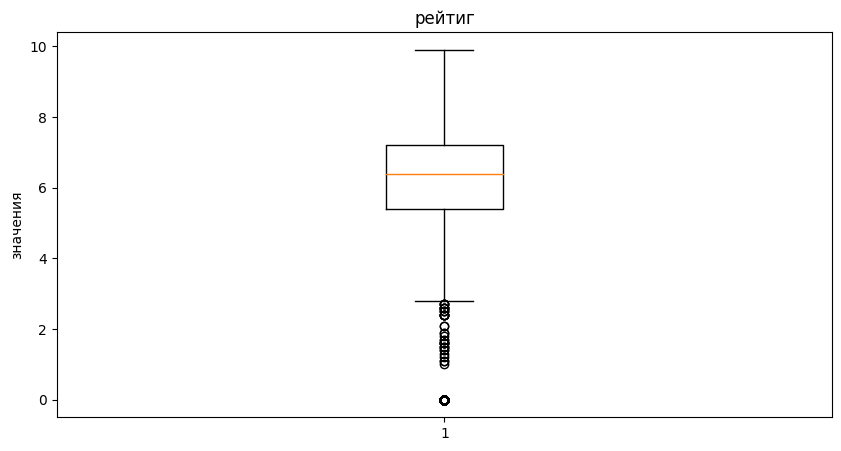

In [79]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['ratings'])
plt.title('рейтиг')
plt.ylabel('значения')
plt.show()

Чистить рейтинг не будем т.к. это категорий стобец

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [80]:
data['show_start_year']  = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [81]:
def first_value_before_comma(data, columns):
    for i in columns:
        data[f'basic_{i}'] = data[i].str.split(',').str[0]
    return data

In [82]:
data= first_value_before_comma(data, ['producer'])

In [83]:
data= first_value_before_comma(data, ['genres'])

In [84]:
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,basic_producer,basic_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Тип финансирования не известен,7.20,"боевик,драма,мелодрама",0.00,боевик,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Тип финансирования не известен,6.60,"драма,военный",0.00,драма,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Тип финансирования не известен,6.80,"фантастика,боевик,триллер",0.00,фантастика,2016,Джим Лемли,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Тип финансирования не известен,6.80,"фантастика,боевик,триллер",0.00,фантастика,2016,Джим Лемли,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Тип финансирования не известен,6.80,"фантастика,боевик,триллер",0.00,фантастика,2015,Джим Лемли,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

для начала отсеиваем нулевые значения

In [85]:
 data_budget_percent = data.query('(refundable_support >  0 | nonrefundable_support > 0) and budget > 0 ')
 data_budget_percent

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,basic_producer,basic_genres
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,драма,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,0.00,Жанр не указан,28140.00,Жанр не указан,2014,А.Тютрюмов,Жанр не указан
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,комедия,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,драма,2014,Л.Антонова,драма
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,драма,2014,А.Миндадзе,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,история,2019,А.Максимов,история
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,мультфильм,2019,С.Сельянов,мультфильм
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",0.00,фантастика,2019,Ф.Бондарчук,фантастика
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,0.00,драма,2019,С.Зернов,драма


In [86]:
percent_of_support  = round(data_budget_percent.eval('(refundable_support + nonrefundable_support) / budget').mean(), 2)
print(f'Государственная поддержка составляет  в среднем {percent_of_support *100} % от общего бюджета')

Государственная поддержка составляет  в среднем 52.0 % от общего бюджета


Добавим столбец с % господдрежки, там где это невозможно посчитать ставим 0

In [87]:
data['per_of_supp'] = round(((data['refundable_support']+data['nonrefundable_support'])/data['budget'])*100, 2)
data['per_of_supp'] = data['per_of_supp'].fillna(0)
print(len(data))
len(data.query('per_of_supp > 0'))

7477


332

Добавил столбец с % гос подддержки, но значений только 332, из 7477. т.к. много где не указан бюджет

Вывод: были добавлены столбцы с номером года выхода фильма, основным продюсером и жанром, так же расчитан средний %  гос. поддержки, который составил 52%. Так же в таблицу добавлен столбец с % гос поддрежки

Общий вывод
Данные, предоставленные в двух файлах — mkrf_movies и mkrf_shows, охватывают период с 2010 по 2019 г. Они содержат информацию о фильмах, получивших прокатное удостоверение и демонстрировавшихся в этот период, всего 7486 записей в первом файле и 3158 во втором.

Файл mkrf_movies включает 15 столбцов с различными типами данных, в том числе float64, int64 и object. Файл mkrf_shows содержит 2 столбца с типами данных int64 и float64.

При первом ознакомлении с описанием данных, до детального изучения, можно выявить некоторые некорректные значения. Типы данных не соответствуют предполагаемым, например, значение столбцов puNumber (прокатное удостоверение), show_start_date (дата начала проката), ratings (рейтинг) указаны неверно.

Количественные значения также содержат некоторые несоответствия. В некоторых случаях значение сборов и финансирования равно 0, что требует дополнительной проверки на наличие ошибок.

Кроме того, в данных присутствуют пропуски значений, которые нельзя игнорировать. В столбцах film_studio, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing source, ratings и genres определенная часть данных отсутствует.

Для заполнения пропусков следует предпринять следующие шаги:

1. Заполнить пустые значения маркерами, например, Страна не указана, Директор не указан, Продюсер не указан, Тип финансирования не известен, Жанр не указан .
2. Там где заполнить пропуски не возможно, внесены значение 0.


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

отсеиваем фильмы у которых не было сборов

In [88]:
df_box_office_has_values = data.query('box_office > 0')

смотрим сколько фильмов выходил в каждый год

In [89]:
view = df_box_office_has_values['show_start_year'].value_counts().sort_values().reset_index()
view.columns = ['year','show_start_year' ]
view = view.sort_values('year')
view

,year,show_start_year
0,2010,101
1,2011,109
2,2012,123
3,2013,179
4,2014,273
6,2015,461
8,2016,525
5,2017,357
7,2018,475
9,2019,530


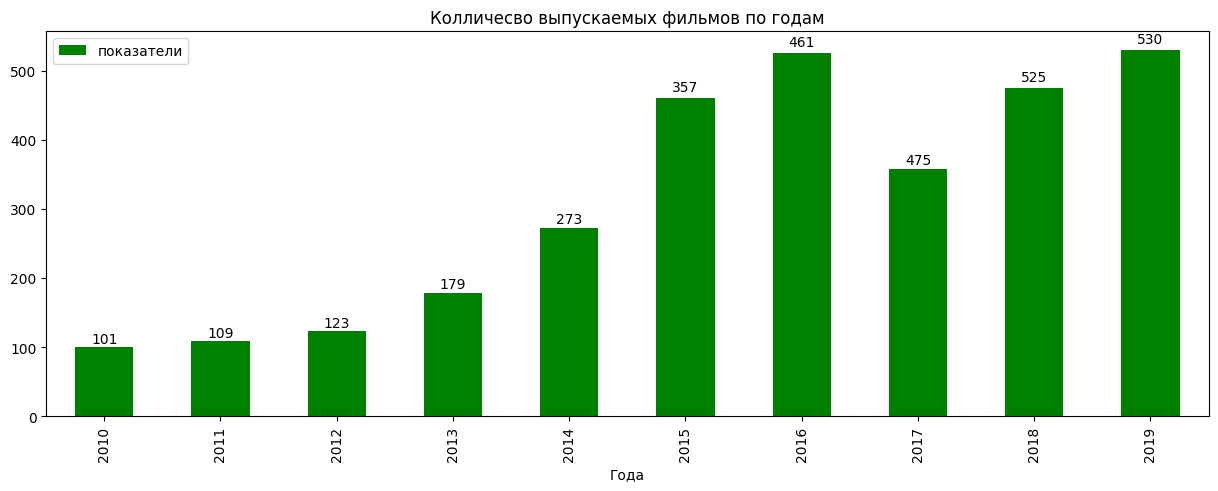

In [90]:
view.plot.bar(x='year', y='show_start_year', color="green",  alpha=1,figsize=(15, 5))
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, view['show_start_year'], height_factor=1.01)

plt.legend (('показатели',))
plt.title('Колличесво выпускаемых фильмов по годам')
ax.set_xlabel("Года")
plt.show()

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [91]:
# максимальная сумма сборов

y = df_box_office_has_values['box_office'].max()

print(f'Максимальная сумма сборов составила  {y}')

Максимальная сумма сборов составила  3073568690.79


In [92]:
# минимальная сумма сборов

y = df_box_office_has_values['box_office'].to_frame().query('box_office > 0').min()
print(f'Минимальная сумма сборов составила  {y}')

Минимальная сумма сборов составила  box_office   40.00
dtype: float64


Делаем сводную таблицу исходя из количества фильмов снятых в год

Делаем сводную таблицу исходя из количества фильмов снятых в год

In [93]:
count_of_year_clear = pd.DataFrame(df_box_office_has_values['show_start_year'].value_counts()).reset_index()
count_of_year_clear.columns = ['show_start_year','count']
count_of_year_clear = count_of_year_clear.sort_values('count')

sum_of_money_clear = df_box_office_has_values.pivot_table(index='show_start_year' , values='box_office',aggfunc=['sum']).reset_index()
sum_of_money_clear.columns = ['show_start_year','sum']
sum_of_money_clear['sum']  = sum_of_money_clear['sum'].astype(int)
sum_of_money_clear

sum_to_count_clear =  count_of_year_clear.merge(sum_of_money_clear, on='show_start_year')
sum_to_count_clear = sum_to_count_clear.sort_values('show_start_year')
sum_to_count_clear

,show_start_year,count,sum
0,2010,101,2428654
1,2011,109,14102765
2,2012,123,6955423
3,2013,179,29799706
4,2014,273,7444951859
6,2015,461,39497363836
8,2016,525,47866299741
5,2017,357,48563707217
7,2018,475,49668403134
9,2019,530,48425708779


Смотрим сколько фильмов выходило в прокат каждый год

In [94]:
sum_to_count_clear

,show_start_year,count,sum
0,2010,101,2428654
1,2011,109,14102765
2,2012,123,6955423
3,2013,179,29799706
4,2014,273,7444951859
6,2015,461,39497363836
8,2016,525,47866299741
5,2017,357,48563707217
7,2018,475,49668403134
9,2019,530,48425708779


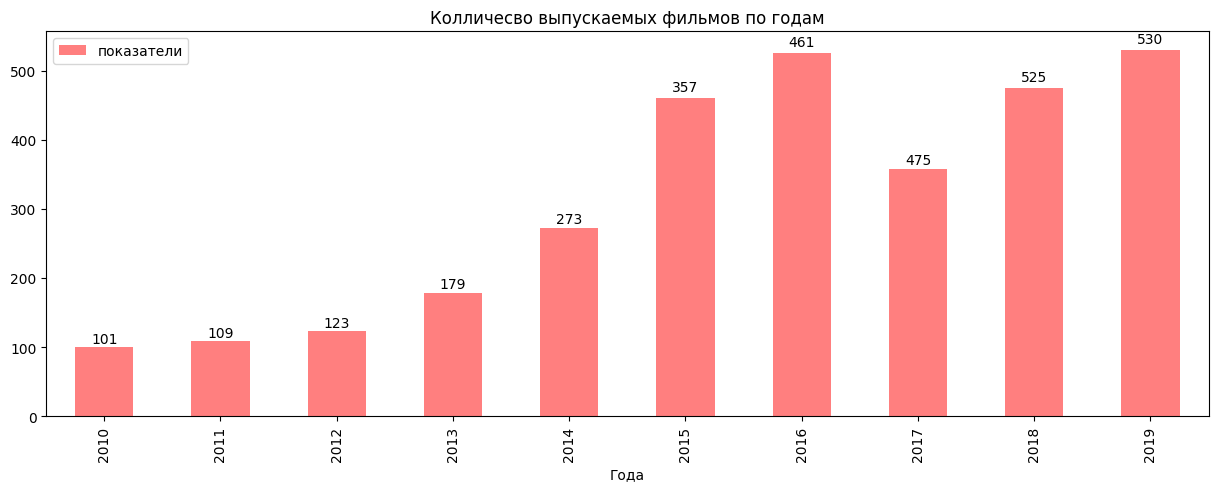

In [95]:
sum_to_count_clear.plot.bar(x='show_start_year', y='count', color="red",  alpha=0.5,figsize=(15, 5))
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, sum_to_count_clear['count'], height_factor=1.01)

plt.legend (('показатели',))
plt.title('Колличесво выпускаемых фильмов по годам')
ax.set_xlabel("Года")
plt.show()

так же мы имеем следущую тенденцию сборов

In [96]:
sum_to_count_clear

,show_start_year,count,sum
0,2010,101,2428654
1,2011,109,14102765
2,2012,123,6955423
3,2013,179,29799706
4,2014,273,7444951859
6,2015,461,39497363836
8,2016,525,47866299741
5,2017,357,48563707217
7,2018,475,49668403134
9,2019,530,48425708779


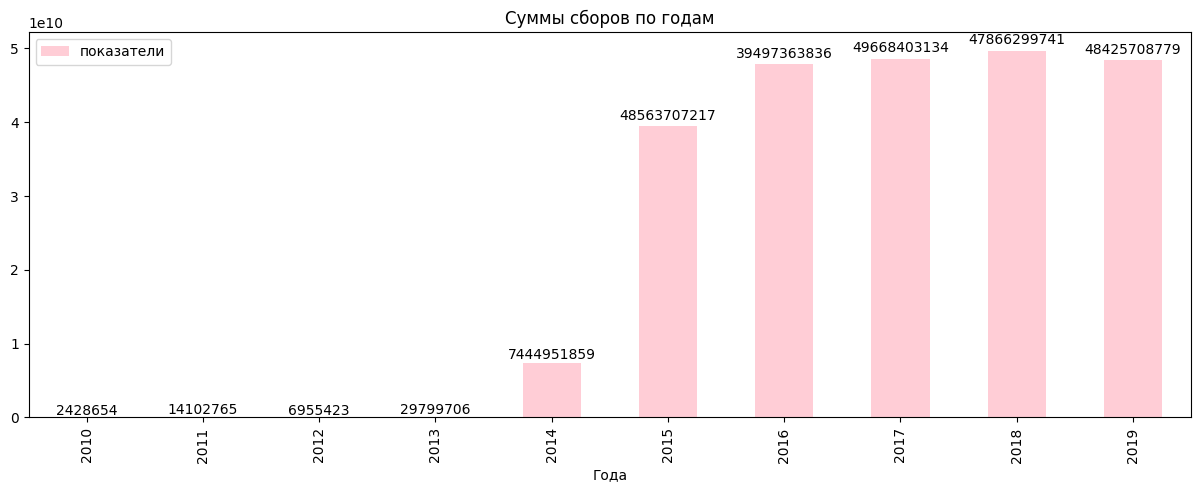

In [97]:
sum_to_count_clear.plot.bar(x='show_start_year', y='sum', color="pink",  alpha=0.78,figsize=(15, 5))
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, sum_to_count_clear['sum'], height_factor=1.01)

plt.legend (('показатели',))
plt.title('Суммы сборов по годам')
ax.set_xlabel("Года")
plt.show()

смотрим сколько всего производилось фильмов в год

In [98]:
count_of_year = pd.DataFrame(data['show_start_year'].value_counts()).reset_index()
count_of_year.columns = ['show_start_year','count']
count_of_year = count_of_year.sort_values('show_start_year')


sum_to_count = count_of_year.merge(sum_to_count_clear, on='show_start_year')
sum_to_count.columns = ['show_start_year','count_all', 'count_clear' , 'sum']
sum_to_count['perc'] = (sum_to_count['count_clear'] /sum_to_count ['count_all'])*100
sum_to_count

,show_start_year,count_all,count_clear,sum,perc
0,2010,984,101,2428654,10.26
1,2011,622,109,14102765,17.52
2,2012,593,123,6955423,20.74
3,2013,629,179,29799706,28.46
4,2014,805,273,7444951859,33.91
5,2015,703,461,39497363836,65.58
6,2016,817,525,47866299741,64.26
7,2017,505,357,48563707217,70.69
8,2018,889,475,49668403134,53.43
9,2019,930,530,48425708779,56.99


In [99]:
round(sum_to_count['perc'].mean(),2)

42.18

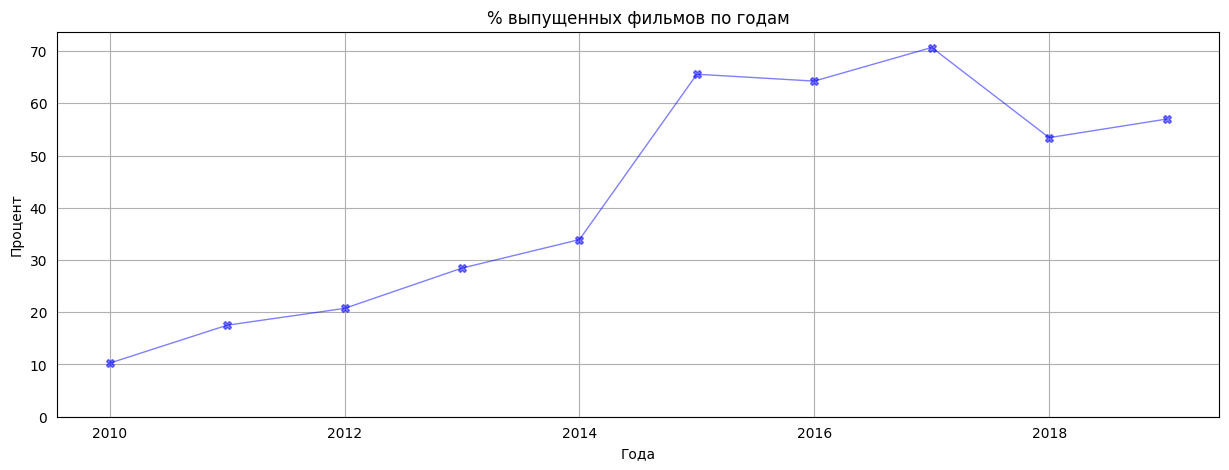

In [100]:
# График для отображения % вышедших фильмов ( отношение производимых к тем у которые вышли в прокат и есть сборы)
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(sum_to_count['show_start_year'], sum_to_count['perc'], color="blue", linewidth=1, marker="X", linestyle="-", alpha=0.5)

plt.ylim(ymin = 0 )
plt.xlabel('Года')
plt.title('% выпущенных фильмов по годам')


# Сетка
ax.grid (axis='y')
ax.grid (axis='x')

# убрать тики
plt.tick_params (left= False , bottom= False )


ax.set_ylabel("Процент")

plt.show()

Вывод: на графике выше видно что процент не выпущеных фильмов падает . можно сделать увидеть на графике что % выпущенных фильмов расчет, это хорошо.  с 2015  по 2017 год. больше все выходило фильмов в прокат по отношению к тем которые выпускались



```
pd.set_option('chained_assignment', None)
или
import warnings`<br>
warnings.filterwarnings("ignore")
```



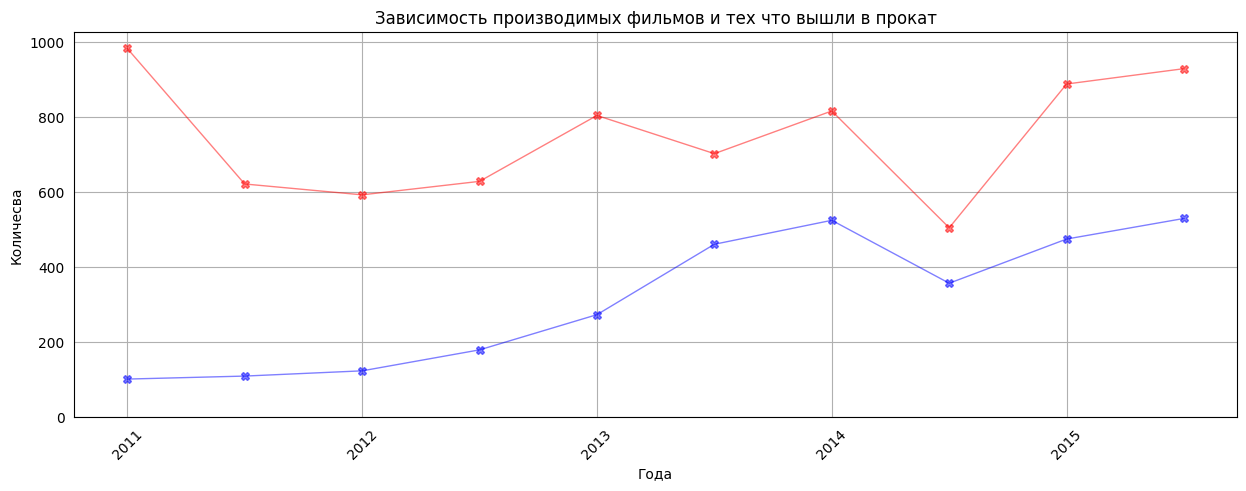

In [101]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(sum_to_count['show_start_year'], sum_to_count['count_clear'], color="blue", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.plot(sum_to_count['show_start_year'], sum_to_count['count_all'], color="Red", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.ylim(ymin = 0 )
plt.xlabel('Года')
plt.title('Зависимость производимых фильмов и тех что вышли в прокат')


# Сетка
ax.grid (axis='y')
ax.grid (axis='x')

# убрать тики
plt.tick_params (left= False , bottom= False )

ax.set_xticklabels(sum_to_count['show_start_year'], rotation=45)  # значения по x по домгонали


ax.set_ylabel("Количесва")   # название по ч по диагонали

plt.show()

Вывод: На графике отображены показатели производимыхх фильмов и вышедших в прокат, после 2013 видна определнная зависимость. чего нельзя сказать о 2011 -2012

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

отсеиваем пустышки

In [102]:
data_for_money_stat = data.query('box_office >0 ')

In [103]:
stat_of_box_office = data_for_money_stat.pivot_table(index= 'show_start_year', values = 'box_office', aggfunc= ['mean', 'median']).reset_index()
stat_of_box_office.columns = ['show_start_year','mean', 'median']
stat_of_box_office.sort_values('mean')

,show_start_year,mean,median
0,2010,24046.08,1710.00
2,2012,56548.15,6220.00
1,2011,129383.17,3000.00
3,2013,166478.81,3580.00
4,2014,27270885.93,20400.00
5,2015,85677578.82,5034342.40
6,2016,91173904.27,3915041.02
9,2019,91369261.85,4627798.34
8,2018,104565059.23,8891102.21
7,2017,136032793.33,9968340.00


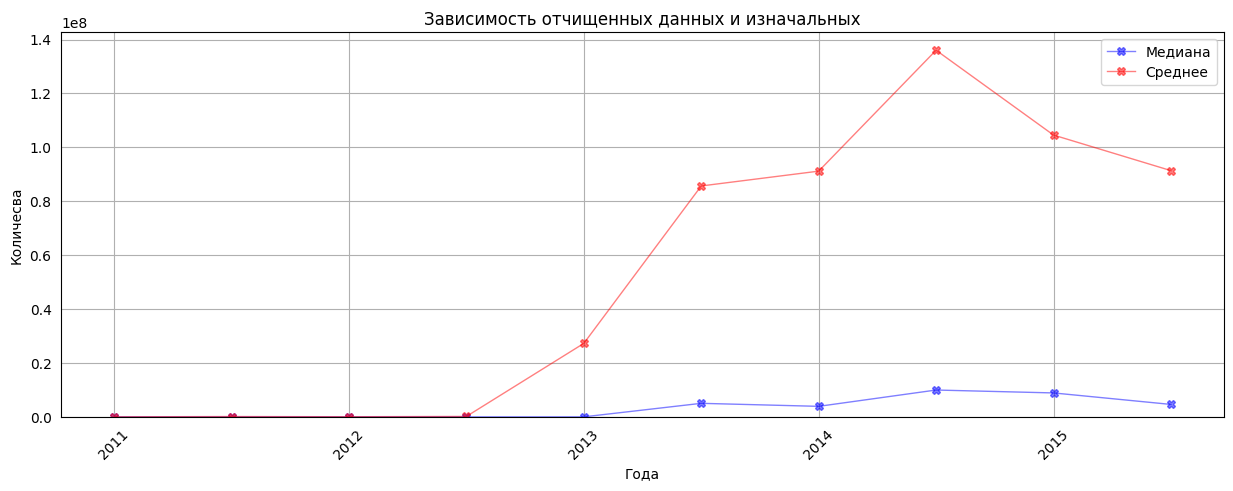

In [104]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(stat_of_box_office['show_start_year'], stat_of_box_office['median'], color="blue", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.plot(stat_of_box_office['show_start_year'], stat_of_box_office['mean'], color="Red", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.ylim(ymin = 0 )
plt.xlabel('Года')
plt.title('Зависимость отчищенных данных и изначальных')


# Сетка
ax.grid (axis='y')
ax.grid (axis='x')

# убрать тики
plt.tick_params (left= False , bottom= False )

ax.set_xticklabels(stat_of_box_office['show_start_year'], rotation=45)  # значения по x по домгонали


ax.set_ylabel("Количесва")
plt.legend (('Медиана','Среднее'))

plt.show()

Вывод: видим зависимость медианы сборов на средее, средеее гораздо выше, значит много фильмов собрало мало средств в прокате. Возможно стоит отчистить от выбросов, но данные могут сильно исказится. Но если убрать выбросы то получим более высокую медиану

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [105]:
data_for_age_stat = data[(data['show_start_year'] >= 2015)& (data['show_start_year'] <= 2019)&  (data['box_office'] > 0)]
data_for_age_stat = data_for_age_stat.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum')
data_for_age_stat.columns = data_for_age_stat.columns.str.split(' ').str[0]
data_for_age_stat

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
show_start_year,,,,,
2015,379053218.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41
2019,17746066.82,12680198773.67,12753418984.60,10121796303.64,12852548650.86


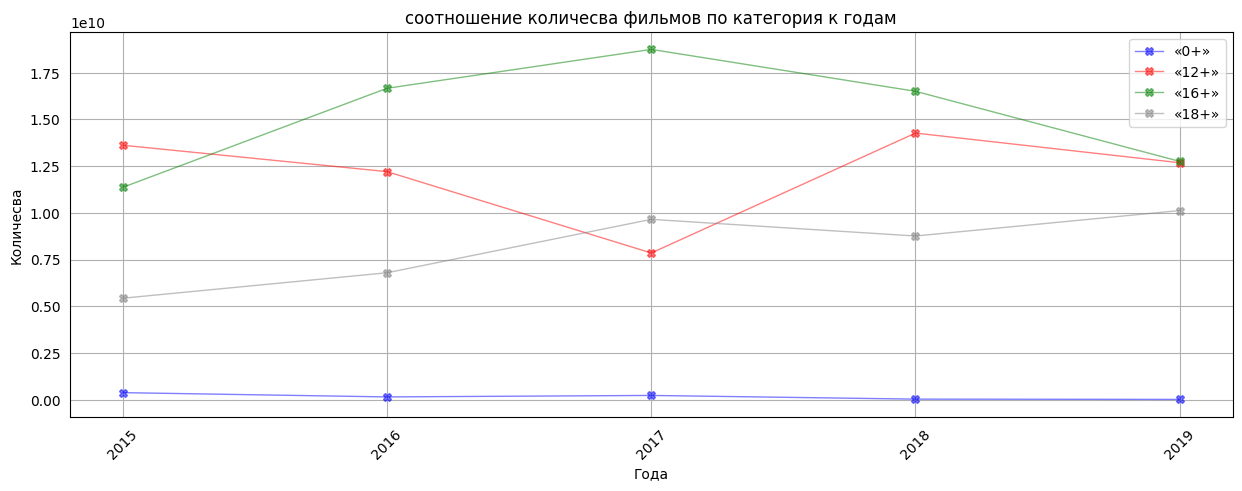

In [106]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(data_for_age_stat.columns, data_for_age_stat['«0+»'], color="blue", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.plot(data_for_age_stat.columns, data_for_age_stat['«12+»'], color="red", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.plot(data_for_age_stat.columns, data_for_age_stat['«16+»'], color="green", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.plot(data_for_age_stat.columns, data_for_age_stat['«18+»'], color="grey", linewidth=1, marker="X", linestyle="-", alpha=0.5)


ax.set_ylabel("Количесва")
plt.xlabel('Года')
plt.title('соотношение количесва фильмов по категория к годам')


# Сетка
ax.grid (axis='y')
ax.grid (axis='x')

# убрать тики
plt.tick_params (left= False , bottom= False )

ax.set_xticklabels(data_for_age_stat.index, rotation=45)

plt.legend ((data_for_age_stat.columns))


plt.show()

Вывод в среднем тендеции около нулевая если не брать в расчет 0+ категорию.  общий тренд около 1, но в любом случае там где есть возрастные ограничение сборов больше.

посмотрим как обстоят дела с максимумами

In [107]:
data_for_age_stat = data[(data['show_start_year'] >= 2015)& (data['box_office'] > 0)]
stat_of_age = data_for_age_stat.pivot_table(index= ['age_restriction','show_start_year'], values = 'box_office', aggfunc= ['max']).reset_index()
stat_of_age.columns = ['age_restriction','show_start_year','max' ]
stat_of_age = stat_of_age.sort_values('max',ascending=False)

In [108]:
stat_of_age.head(10)

,age_restriction,show_start_year,max
9,«12+» - для детей старше 12 лет,2019,3073568690.79
22,«6+» - для детей старше 6 лет,2017,2779686144.00
14,«16+» - для детей старше 16 лет,2019,2576613776.83
8,«12+» - для детей старше 12 лет,2018,2271754004.52
12,«16+» - для детей старше 16 лет,2017,2118396119.00
21,«6+» - для детей старше 6 лет,2016,2048126108.00
13,«16+» - для детей старше 16 лет,2018,1913257923.06
24,«6+» - для детей старше 6 лет,2019,1911944865.95
19,«18+» - запрещено для детей,2019,1890368076.47
5,«12+» - для детей старше 12 лет,2015,1658861425.50


In [109]:
stat_of_age

,age_restriction,show_start_year,max
9,«12+» - для детей старше 12 лет,2019,3073568690.79
22,«6+» - для детей старше 6 лет,2017,2779686144.00
14,«16+» - для детей старше 16 лет,2019,2576613776.83
8,«12+» - для детей старше 12 лет,2018,2271754004.52
12,«16+» - для детей старше 16 лет,2017,2118396119.00
21,«6+» - для детей старше 6 лет,2016,2048126108.00
13,«16+» - для детей старше 16 лет,2018,1913257923.06
24,«6+» - для детей старше 6 лет,2019,1911944865.95
19,«18+» - запрещено для детей,2019,1890368076.47
5,«12+» - для детей старше 12 лет,2015,1658861425.50


Вывод максимальная сумма сборов была у категорий 6+, 12+ , 16+. в Целом данные чередуются, то есть от года к году разные категории приносят по разному, но тем не менее есть тенднеция что от года к году максимумы сборов все больше и больше.

График по текущей выборке

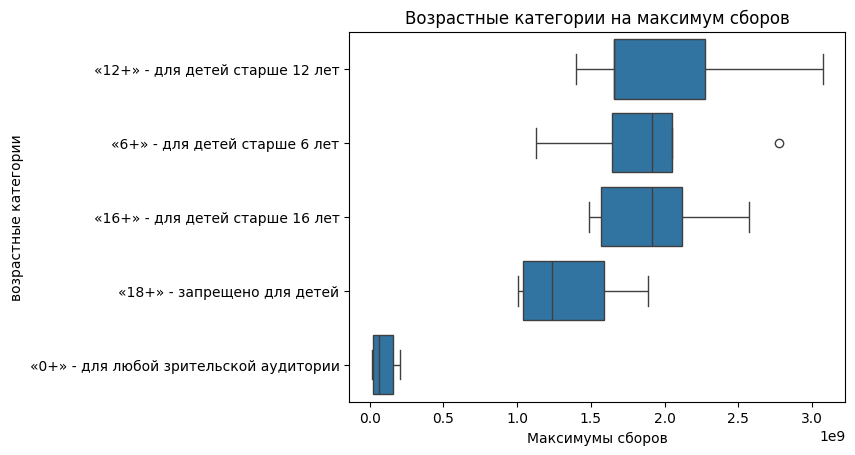

In [110]:
fig, ax = plt.subplots()

sns.boxplot(y="age_restriction", x="max", data=stat_of_age, orient="h", ax=ax)

ax.set_title("Возрастные категории на максимум сборов")

ax.set_xlabel("Максимумы сборов")
ax.set_ylabel("возрастные категории")

# Show the plot
plt.show()

График за весь период

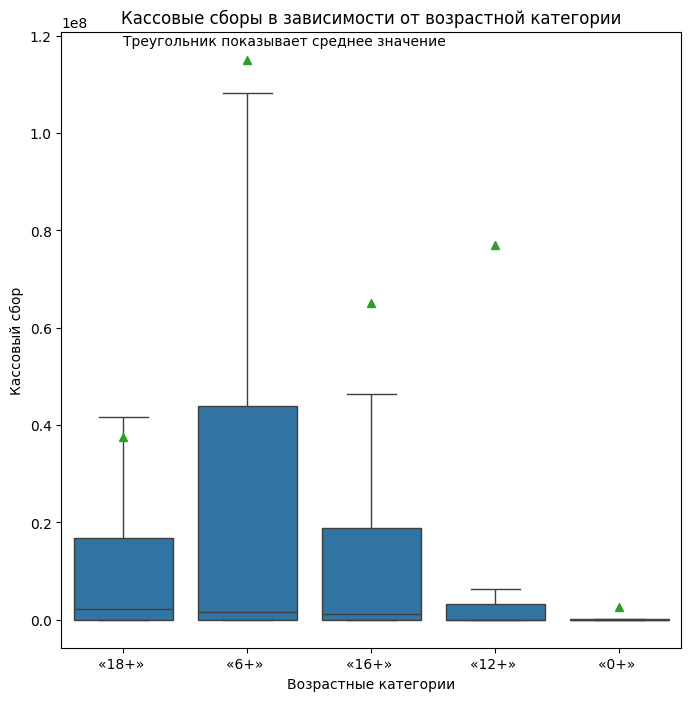

In [111]:
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['show_start_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 1.18e8,'Треугольник показывает среднее значение')
plt.show()

вывод
в шаге 3 было обнаружено тенденция что с годами выпускается все больше и больше фильмов
так же было расчитано максиммальная /минимальная сумма сборов по годам.

Минимум составил 2428654 руб в 2010 году при 101 фильме
Максимум составил 48425708779 руб в 2019 году  при 530 фильмах

Так же выяснилось что есть положительная тенденция по сборам  от 2010 к 2019 году.

Но не все производимые фильмы были выпущены в прокат( по ним нет данных)
в Среднем в период 2010-2019 не было выпущено(нет информации) 42,18%

Так же в данных в данных было обнаружено что среднее и медианная сильно отличаются.
значит есть фавориты которые делаеют большие сборы, а большая часть приносит не большой доход

Так же в данных обнаружено что максимальные касовые сборы были у категорий 6+, затем по убыванию 16+, 18+, 12+,0+
Так же выяснилось что есть положительная тенденция по отношение произовдимыз фильмов и тех которые выпущены в прокат.с 2015 по 2017 год. больше все выходило фильмов в прокат по отношению к тем которые выпускались

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Далаем выборку с нужными полями

In [112]:
support = data[['title','show_start_year','age_restriction','basic_genres','refundable_support' ,'nonrefundable_support','budget','financing_source','ratings']]
support = support.query('ratings>0')

In [113]:
support_budget = support.query('budget > 0 and nonrefundable_support > 0 ')
support_budget

,title,show_start_year,age_restriction,basic_genres,refundable_support,nonrefundable_support,budget,financing_source,ratings
1281,Пока еще жива,2013,«16+» - для детей старше 16 лет,драма,0.00,26500000.00,79411900.00,Министерство культуры,8.10
1498,Невидимки,2013,«12+» - для детей старше 12 лет,комедия,0.00,107847945.00,176023490.00,Фонд кино,5.30
1524,БЕРЦЫ,2014,«16+» - для детей старше 16 лет,драма,0.00,28000000.00,40574140.00,Министерство культуры,4.20
1792,Братья Ч,2014,«16+» - для детей старше 16 лет,драма,0.00,25000000.00,40015122.00,Министерство культуры,6.40
1853,Тайна Сухаревой башни. Чародей равновесия,2015,«6+» - для детей старше 6 лет,мультфильм,0.00,25000000.00,51850000.00,Министерство культуры,6.10
...,...,...,...,...,...,...,...,...,...
7455,Холоп,2019,«12+» - для детей старше 12 лет,комедия,25000000.00,35000000.00,160000000.00,Фонд кино,6.80
7463,Союз спасения,2019,«12+» - для детей старше 12 лет,история,100000000.00,400000000.00,980000000.00,Фонд кино,6.00
7473,Вторжение,2019,«12+» - для детей старше 12 лет,фантастика,100000000.00,400000000.00,944000000.00,Фонд кино,5.70
7475,Я свободен,2019,«12+» - для детей старше 12 лет,драма,0.00,30000000.00,46154000.00,Министерство культуры,5.90


In [114]:
difference = support_budget['budget'] - support_budget['nonrefundable_support']
percentage_difference = (difference / support_budget['budget']) * 100

print(f' В среднем объем невозвратных вложений государства составляет  { round(percentage_difference.mean(),2)} %')

 В среднем объем невозвратных вложений государства составляет  54.32 %


In [115]:
non_ref_support_budget = support_budget.query('refundable_support > 0')
non_ref_support_budget

,title,show_start_year,age_restriction,basic_genres,refundable_support,nonrefundable_support,budget,financing_source,ratings
1869,А зори здесь тихие..._,2015,«12+» - для детей старше 12 лет,драма,50000000.00,100000000.00,220588394.00,Фонд кино,8.50
1986,Елки Лохматые,2014,«6+» - для детей старше 6 лет,семейный,26000000.00,30000000.00,80000000.00,Фонд кино,5.00
2004,Снежная Королева 2: Перезаморозка,2014,«0+» - для любой зрительской аудитории,мультфильм,30000000.00,40000000.00,252489571.00,Фонд кино,6.50
2141,Территория,2015,«12+» - для детей старше 12 лет,детектив,30000000.00,30000000.00,500000000.00,Фонд кино,6.80
2287,12 месяцев. Новая сказка,2014,«0+» - для любой зрительской аудитории,семейный,15000000.00,5000000.00,90120000.00,Фонд кино,3.80
...,...,...,...,...,...,...,...,...,...
7452,Фиксики против кработов,2019,«6+» - для детей старше 6 лет,мультфильм,80000000.00,40000000.00,270000000.00,Фонд кино,7.50
7455,Холоп,2019,«12+» - для детей старше 12 лет,комедия,25000000.00,35000000.00,160000000.00,Фонд кино,6.80
7463,Союз спасения,2019,«12+» - для детей старше 12 лет,история,100000000.00,400000000.00,980000000.00,Фонд кино,6.00
7473,Вторжение,2019,«12+» - для детей старше 12 лет,фантастика,100000000.00,400000000.00,944000000.00,Фонд кино,5.70


In [116]:
difference = support_budget['nonrefundable_support'] - support_budget['refundable_support']
percentage_difference = (difference / support_budget['nonrefundable_support']) * 100

print(f' В среднем объем возвратных вложений стоставляет  { round(percentage_difference.mean(),2)} %')

 В среднем объем возвратных вложений стоставляет  73.96 %


предположим что хорошие фильмы имеют рейтинг более 7,5

In [117]:
raiting_to_budget = data.query('ratings >= 7.5 and budget > 0')
raiting_to_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,basic_producer,basic_genres,per_of_supp
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,драма,2013,А.Атанесян,драма,33.37
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,Р.Давлетьяров,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,драма,2015,Р.Давлетьяров,драма,68.00
2131,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.00,27510000.00,131000000.00,Министерство культуры,7.50,"биография,военный,драма",401804461.90,биография,2015,Н.Мокрицкая,биография,21.00
2145,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,10000000.00,40000000.00,Министерство культуры,9.40,"фантастика,боевик,комедия",334750.00,фантастика,2015,Ю.Кара,фантастика,25.00
2481,Однажды._,111004215,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.00,97000000.00,156360666.00,Фонд кино,7.90,"драма,криминал,детектив",12748398.30,драма,2015,Р.Давлетьяров,драма,62.04
2857,28 Панфиловцев,111000916,2016-01-27 12:00:00+00:00,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,0.00,30000000.00,85384000.00,Министерство культуры,7.50,"военный,драма,история",363622804.90,военный,2016,А.Шальопа,военный,35.14
2919,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.00,392104482.00,635283867.00,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,драма,2016,Л.Верещагин,драма,69.59
3138,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,4700000.00,14462464.00,Министерство культуры,9.00,драма,801370.00,драма,2015,С.Кикнавелидзе,драма,32.50
3156,ХИТ,111019515,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Дип Коммьюникейшн""",Россия,М.Михайлова,"Е.Яцура, В.Кузнецов",«16+» - для детей старше 16 лет,0.00,21700000.00,37000990.00,Министерство культуры,7.70,"драма,комедия",129333.50,драма,2015,Е.Яцура,драма,58.65
3254,Время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,75000000.00,175000000.00,528441977.00,Фонд кино,7.50,"приключения,триллер,биография",544332260.00,приключения,2017,Т.Бекмамбетов,приключения,47.31


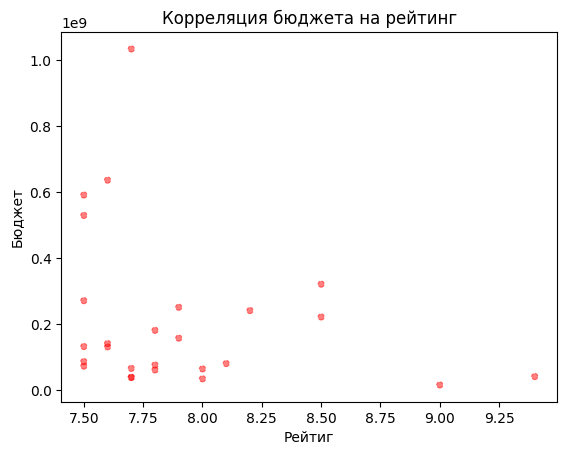

In [118]:
fig, ax = plt.subplots()

# Plot the data
raiting_to_budget.plot(ax=ax, x='ratings', y='budget', kind='scatter', color="red", linewidth=0.75,marker="o", linestyle="--", alpha=0.5)

# Set the labels for the axes
ax.set_xlabel('Рейтиг')
ax.set_ylabel('Бюджет')
plt.title('Корреляция бюджета на рейтинг')
# Show the plot
plt.show()

Выввод бюджет фильнов с рейтингом более 7,5, имее не пропорционально распередление бюджета. то есть нету закономерности чем больше бюджет тем лучше получится фильм

общий вывод:
были расчитаны следующие показатели
объем невозвратных вложений государства составляет  54.32 %
объем возвратных вложений стоставляет  73.96 %

так же выяснили что большой бюджет не всегда = высокий рейтинг

Посмотрим как влияет финансирование на рейтинг, сделаем с и без и ототбразим на графике

In [119]:
r = 'Министерство культуры','Фонд кино', 'Министерство культуры, Фонд кино'

In [120]:
support_plus = data.query('financing_source  in @r ').pivot_table(index ='basic_genres', values = 'ratings', aggfunc= ['mean']).reset_index()
support_plus.columns = ['basic_genres','financing_source' ]

In [121]:
support_minus = data.pivot_table(index ='basic_genres', values = 'ratings', aggfunc= ['mean']).reset_index()
support_minus.columns = ['basic_genres','financing_source_none' ]


In [122]:
finn_score = support_minus.merge(support_plus, on = 'basic_genres')
finn_score= finn_score[finn_score['basic_genres']!="Жанр не указан"]
finn_score.sort_values('financing_source')

,basic_genres,financing_source_none,financing_source
18,ужасы,5.66,5.20
7,история,6.54,5.35
15,семейный,5.95,5.41
8,комедия,5.99,5.51
14,реальное ТВ,5.60,5.60
17,триллер,6.59,5.71
11,мультфильм,6.27,5.80
13,приключения,6.40,5.87
10,мелодрама,6.52,5.95
20,фэнтези,6.59,6.09


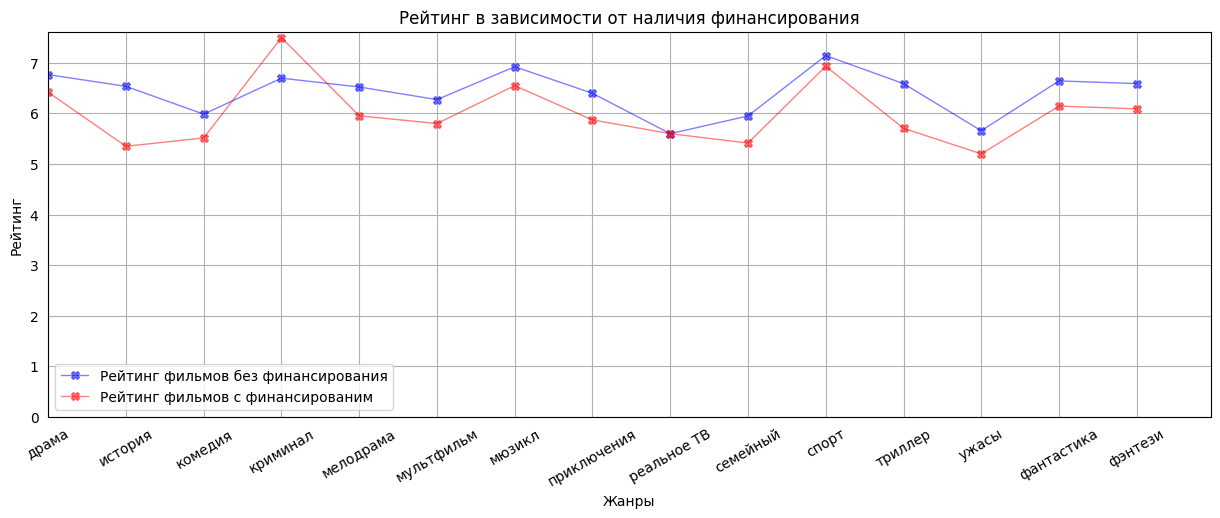

In [123]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(finn_score['basic_genres'], finn_score['financing_source_none'], color="blue", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.plot(finn_score['basic_genres'], finn_score['financing_source'], color="Red", linewidth=1, marker="X", linestyle="-", alpha=0.5)
plt.ylim(ymin=0)
plt.xlim(xmin=5)

ax.set_xticklabels(finn_score['basic_genres'], rotation=30)  # значения по x по диагонали


ax.set_ylabel("Рейтинг", rotation=90)   # название по y по диагонали


# Сетка
ax.grid (axis='y')
ax.grid (axis='x')

# убрать тики
plt.tick_params (left= False , bottom= False )



plt.legend (('Рейтинг фильмов без финансирования', 'Рейтинг фильмов с финансированим'))
plt.title('Рейтинг в зависимости от наличия финансирования')
plt.xlabel('Жанры')
plt.show()



Вывод: наличие финансирования влияет на рейтинг как показывает график. фильмы без финансирования имеют чуть выше рейтинг в среднем нежели фильмы с финансированием.

Расчитаем сколько всего было снято фильмов с участием гос поддержки

In [124]:
r

('Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино')

In [125]:
payback_with_supp= data.query('financing_source in @r and budget != 0 and box_office != 0 ')
len(payback_with_supp)

301

In [126]:
x = np.array([(payback_with_supp['box_office'] - (payback_with_supp['budget'] - payback_with_supp['refundable_support'])) / (payback_with_supp['budget'] - payback_with_supp['refundable_support'] - payback_with_supp['nonrefundable_support'])])


print(f'Средний % окупаемости составил  {round(x.mean()*100,2)} %')

Средний % окупаемости составил  -55.22 %


### Шаг 5. Напишите общий вывод

Вывод:
в первой части проекта была выполнена обработка данных. выявлены пропуски, не соответствия типов данных, дубли, лишние пробелы. все это было обнаружено и исправлено. по итогу мы имеем датасет в котором нету пропусков, а так же все типы данных стандартизированы и приведённые к виду с которым можно работать дальше.

 - Далее было произведено исследование в котором было обнаружено что, много фильмов выпущено, но не все они имею сборы. следовательно они произведены, но по ним еще нету статистики.
 - Так же по данным видно что в среднем доход фильмов имеет немного положительную тенденцию, но не особо явную. Но вот максимальные сборы были сделаны на фильмах в категорях 6+ ,12+ , 16+ лет.
 - Было выявлено что бюджет не так уж и сильно влияет на сумму бюджета. т.к. фильмы с рейтингом 7,5 - 8 имеют довольно большой бюджет на этапе производства, а вот фильмы с рейтингом 8+ имею примерно такой же бюджет, а то и немного ниже. то есть можно сказать что нет зависимости между рейтингом фильма и его бюджетом.
 - Так же видно что фильмы без финансирования набирают чуть больше рейтинг нежели фильмы с финансированием в среднем.
 - Вывод были импортированы нужные для работы библиотеки, так же загружены файлы. просмотрены по ним типы данных и то что в них хранится
 - Вывод: были добавлены столбцы с номером года выхода фильма, основным продюсером и жанром, так же рассчитан средний % гос. поддержки, который составил 52%

Общий вывод:
Данные, полученные из двух файлов, mkrf_movies и mkrf_shows, включают информацию о фильмах и программах, получивших прокатное удостоверение в период с 2010 по 2019 г., а также их финансовых показателях, рейтингах и жанрах. В процессе работы были обнаружены некоторые некорректные значения типов данных, несоответствия в количественных данных и пропуски значений. Эти данные были очищены, исправлены и дополнены, что позволило создать более качественный и полезный датасет для дальнейшего анализа.

В результате проведенного анализа было обнаружено:

 - что с годами выпускается все больше и больше фильмов
 - так же было рассчитано максиммальная /минимальная сумма сборов по годам.
        - Минимум составил 2428654 руб в 2010 году при 101 фильме
        - Максимум составил 48425708779 руб в 2019 году  при 530 фильмах

Так же выяснилось что есть положительная тенденция по сборам  от 2010 к 2019 году.

Но не все производимые фильмы были выпущены в прокат( по ним нет данных)
в Среднем в период 2010-2019 не было выпущено(нет информации) 42,18%

Так же в данных в данных было обнаружено что среднее и медианная сильно отличаются.
значит есть фавориты которые делаеют большие сборы, а большая часть приносит не большой доход

Так же в данных обнаружено что максимальные касовые сборы были у категорий 6+, затем по убыванию 16+, 18+, 12+,0+

Так же выяснилось что есть положительная тенденция по отношение произовдимых фильмов и тех которые выпущены в прокат с 2015 по 2017 год. больше все выходило фильмов в прокат по отношению к тем которые выпускались